In [ ]:
#Question1- Write a Python program to perform a Z-test for comparing a sample mean to a known population mean and interpret the results.
import scipy.stats as stats
import numpy as np

def z_test(sample, pop_mean, pop_std, alpha=0.05):
    """
    Perform a one-sample Z-test.

    Parameters:
    sample (list or array): The sample data.
    pop_mean (float): The known population mean.
    pop_std (float): The known population standard deviation.
    alpha (float): The significance level (default is 0.05).

    Returns:
    None (prints the test results).
    """
    sample_size = len(sample)
    sample_mean = np.mean(sample)

    # Calculate Z-score
    z_score = (sample_mean - pop_mean) / (pop_std / np.sqrt(sample_size))

    # Calculate p-value (two-tailed test)
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

    print(f"Sample Mean: {sample_mean:.4f}")
    print(f"Z-score: {z_score:.4f}")
    print(f"P-value: {p_value:.4f}")

    # Decision Rule
    if p_value < alpha:
        print("Reject the null hypothesis: The sample mean is significantly different from the population mean.")
    else:
        print("Fail to reject the null hypothesis: No significant difference between the sample mean and population mean.")

# Example usage
sample_data = [100, 102, 98, 105, 101, 97, 103, 104, 99, 100]
population_mean = 100
population_std = 5

z_test(sample_data, population_mean, population_std)



Sample Mean: 100.9000
Z-score: 0.5692
P-value: 0.5692
Fail to reject the null hypothesis: No significant difference between the sample mean and population mean.


In [ ]:
#Question2- Simulate random data to perform hypothesis testing and calculate the corresponding P-value using Python.
# Simulate random data
np.random.seed(42)  # For reproducibility
sample_data = np.random.normal(loc=100, scale=5, size=30)  # Mean 100, Std Dev 5, Sample size 30
population_mean = 100
population_std = 5

z_test(sample_data, population_mean, population_std)

Sample Mean: 99.0593
Z-score: -1.0305
P-value: 0.3028
Fail to reject the null hypothesis: No significant difference between the sample mean and population mean.


In [ ]:
#Question3-Implement a one-sample Z-test using Python to compare the sample mean with the population mean.
import numpy as np
from scipy import stats

def one_sample_z_test(sample, population_mean, population_std, alpha=0.05):
    """
    Perform a one-sample Z-test.

    Parameters:
    sample (list or numpy array): Sample data
    population_mean (float): Known population mean
    population_std (float): Known population standard deviation
    alpha (float): Significance level (default is 0.05)

    Returns:
    z_score (float): Computed Z-score
    p_value (float): Corresponding p-value
    conclusion (str): Result of the hypothesis test
    """
    sample_mean = np.mean(sample)
    sample_size = len(sample)

    # Compute the Z-score
    z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))

    # Compute the p-value (two-tailed test)
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

    # Determine the result
    if p_value < alpha:
        conclusion = "Reject the null hypothesis: The sample mean is significantly different from the population mean."
    else:
        conclusion = "Fail to reject the null hypothesis: No significant difference between the sample and population mean."

    return z_score, p_value, conclusion

# Example usage
sample_data = [50, 52, 48, 49, 51, 53, 47, 50, 49, 52]
population_mean = 50
population_std = 2
z_score, p_value, result = one_sample_z_test(sample_data, population_mean, population_std)
print(f"Z-score: {z_score}")
print(f"P-value: {p_value}")
print(f"Conclusion: {result}")

Z-score: 0.15811388300842122
P-value: 0.87436706116289
Conclusion: Fail to reject the null hypothesis: No significant difference between the sample and population mean.


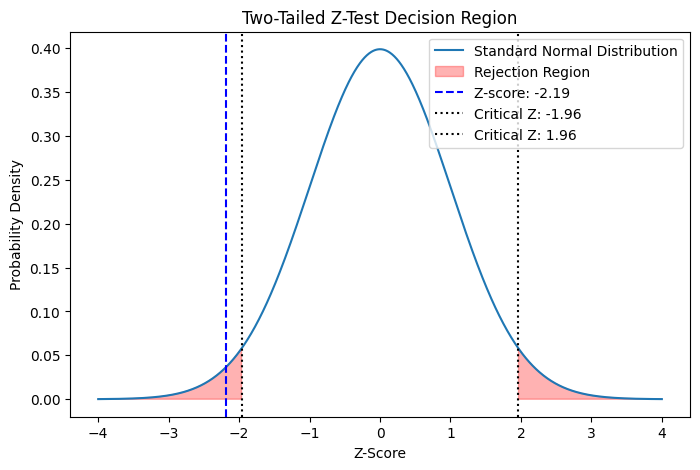

Reject the null hypothesis.


In [ ]:
#Question4- Perform a two-tailed Z-test using Python and visualize the decision region on a plot.
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Given data
sample_mean = 50
population_mean = 52
population_std = 5
sample_size = 30
alpha = 0.05

# Compute the Z-score
z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))

# Find critical Z-values for two-tailed test
z_critical = stats.norm.ppf(1 - alpha/2)

# Decision Rule
reject_region = [-z_critical, z_critical]

# Visualization
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)

plt.figure(figsize=(8, 5))
plt.plot(x, y, label='Standard Normal Distribution')
plt.fill_between(x, y, where=(x < -z_critical) | (x > z_critical), color='red', alpha=0.3, label='Rejection Region')
plt.axvline(z_score, color='blue', linestyle='--', label=f'Z-score: {z_score:.2f}')
plt.axvline(-z_critical, color='black', linestyle='dotted', label=f'Critical Z: {-z_critical:.2f}')
plt.axvline(z_critical, color='black', linestyle='dotted', label=f'Critical Z: {z_critical:.2f}')

plt.title('Two-Tailed Z-Test Decision Region')
plt.xlabel('Z-Score')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# Decision
if z_score < -z_critical or z_score > z_critical:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

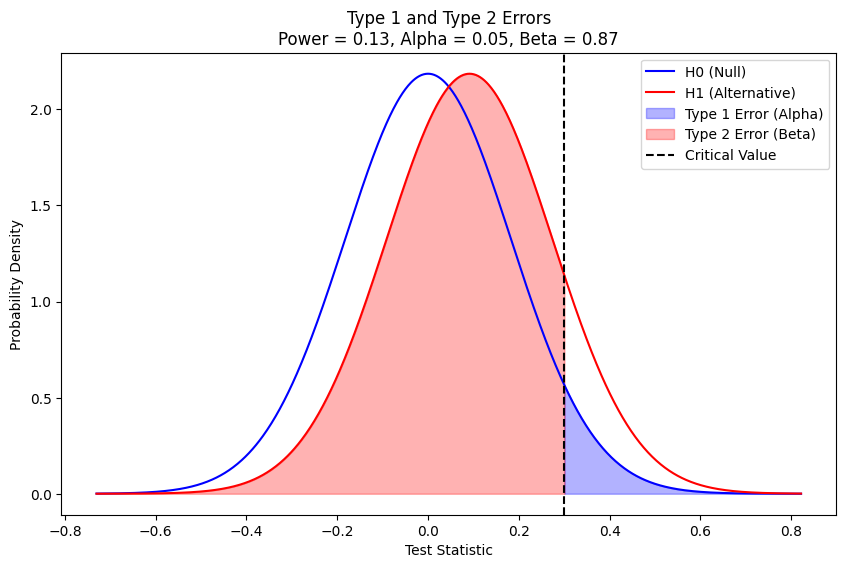

In [ ]:
#Question5- Create a Python function that calculates and visualizes Type 1 and Type 2 errors during hypothesis testing.
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def visualize_type1_type2_errors(alpha=0.05, effect_size=0.5, sample_size=30):
    """
    Visualizes Type 1 and Type 2 errors in hypothesis testing.

    Parameters:
    alpha (float): Significance level (probability of Type 1 error)
    effect_size (float): Difference between means in standard deviation units
    sample_size (int): Number of observations per sample
    """

    # Define population parameters
    mu_0 = 0  # Mean under null hypothesis H0
    sigma = 1 / np.sqrt(sample_size)  # Standard error (assuming population variance = 1)

    # Calculate critical value based on alpha
    z_alpha = stats.norm.ppf(1 - alpha)
    critical_value = mu_0 + z_alpha * sigma

    # Define alternative hypothesis mean
    mu_1 = mu_0 + effect_size * sigma

    # Calculate Type 2 error (beta)
    beta = stats.norm.cdf(critical_value, loc=mu_1, scale=sigma)
    power = 1 - beta  # Power of the test

    # Generate x values for plotting
    x = np.linspace(mu_0 - 4 * sigma, mu_1 + 4 * sigma, 1000)

    # Compute PDFs
    y_H0 = stats.norm.pdf(x, loc=mu_0, scale=sigma)
    y_H1 = stats.norm.pdf(x, loc=mu_1, scale=sigma)

    # Plot the distributions
    plt.figure(figsize=(10, 6))
    plt.plot(x, y_H0, label='H0 (Null)', color='blue')
    plt.plot(x, y_H1, label='H1 (Alternative)', color='red')

    # Shade Type 1 Error Region (Alpha)
    x_alpha = np.linspace(critical_value, mu_1 + 4 * sigma, 300)
    plt.fill_between(x_alpha, stats.norm.pdf(x_alpha, mu_0, sigma), alpha=0.3, color='blue', label='Type 1 Error (Alpha)')

    # Shade Type 2 Error Region (Beta)
    x_beta = np.linspace(mu_0 - 4 * sigma, critical_value, 300)
    plt.fill_between(x_beta, stats.norm.pdf(x_beta, mu_1, sigma), alpha=0.3, color='red', label='Type 2 Error (Beta)')

    # Add labels and legend
    plt.axvline(critical_value, color='black', linestyle='--', label='Critical Value')
    plt.xlabel('Test Statistic')
    plt.ylabel('Probability Density')
    plt.title(f'Type 1 and Type 2 Errors\nPower = {power:.2f}, Alpha = {alpha}, Beta = {beta:.2f}')
    plt.legend()
    plt.show()

# Example usage
visualize_type1_type2_errors()

In [ ]:
#Question6- Write a Python program to perform an independent T-test and interpret the results.

import numpy as np
import scipy.stats as stats

def perform_t_test(sample1, sample2, alpha=0.05):
    """
    Perform an independent T-test between two samples and interpret the result.

    Parameters:
    sample1 (list or array): First sample dataset
    sample2 (list or array): Second sample dataset
    alpha (float): Significance level (default is 0.05)

    Returns:
    None (prints the results)
    """

    # Perform an independent t-test
    t_stat, p_value = stats.ttest_ind(sample1, sample2, equal_var=False)  # Welch's T-test (default is equal_var=True)

    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_value:.4f}")

    # Interpret results
    if p_value < alpha:
        print("Result: Reject the null hypothesis. There is a significant difference between the two groups.")
    else:
        print("Result: Fail to reject the null hypothesis. No significant difference found between the groups.")

# Example usage
np.random.seed(42)  # For reproducibility
sample1 = np.random.normal(50, 10, 30)  # Sample 1: Mean=50, Std=10, Size=30
sample2 = np.random.normal(55, 10, 30)  # Sample 2: Mean=55, Std=10, Size=30

perform_t_test(sample1, sample2)


T-statistic: -2.3981
P-value: 0.0197
Result: Reject the null hypothesis. There is a significant difference between the two groups.


T-statistic: -1.6403, P-value: 0.1118


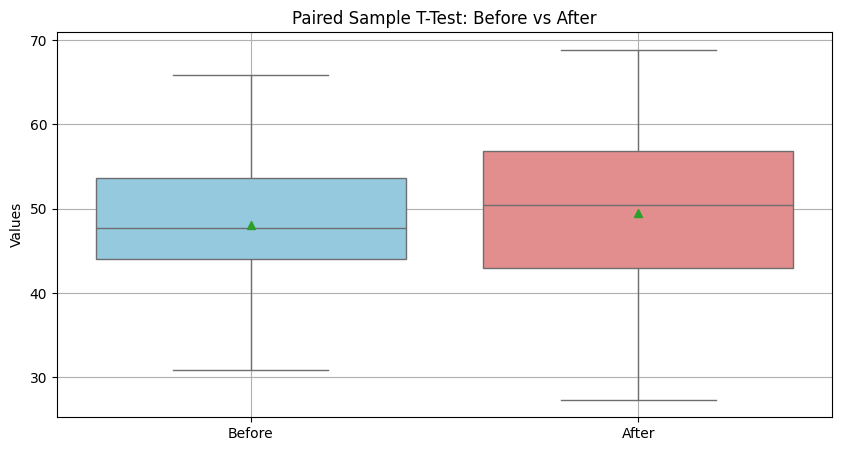

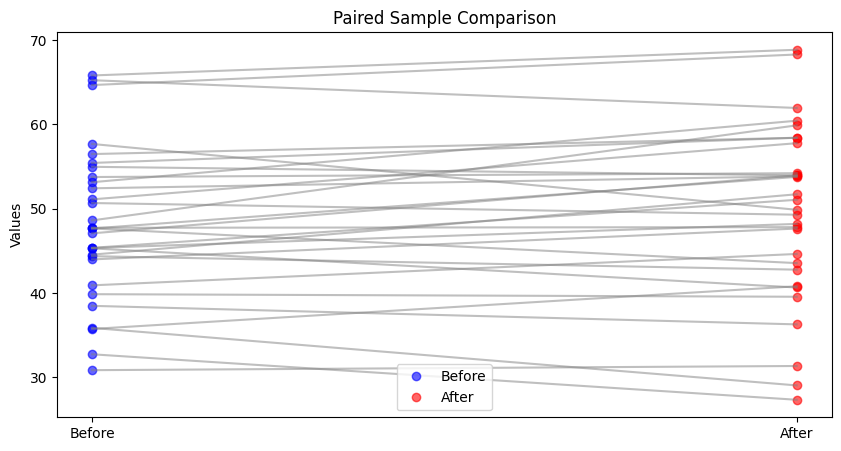

In [ ]:
#Question7- Perform a paired sample T-test using Python and visualize the comparison results.
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Generate sample paired data
np.random.seed(42)
data_before = np.random.normal(loc=50, scale=10, size=30)
data_after = data_before + np.random.normal(loc=2, scale=5, size=30)  # Slight increase

# Perform paired sample T-test
t_stat, p_value = stats.ttest_rel(data_before, data_after)
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

# Visualize the results
plt.figure(figsize=(10,5))

# Box plot comparison
sns.boxplot(data=[data_before, data_after], palette=["skyblue", "lightcoral"], showmeans=True)
plt.xticks([0, 1], ['Before', 'After'])
plt.ylabel("Values")
plt.title("Paired Sample T-Test: Before vs After")
plt.grid(True)
plt.show()

# Paired line plot
plt.figure(figsize=(10,5))
plt.plot(["Before"] * len(data_before), data_before, "bo", alpha=0.6, label="Before")
plt.plot(["After"] * len(data_after), data_after, "ro", alpha=0.6, label="After")
for i in range(len(data_before)):
    plt.plot(["Before", "After"], [data_before[i], data_after[i]], "gray", alpha=0.5)
plt.ylabel("Values")
plt.title("Paired Sample Comparison")
plt.legend()
plt.show()


In [ ]:
#Question8- Simulate data and perform both Z-test and T-test, then compare the results using Python.
import numpy as np
import scipy.stats as stats

# Simulate data
np.random.seed(42)
n1, n2 = 30, 30  # Sample sizes
mu1, mu2 = 50, 52  # Population means
sigma1, sigma2 = 10, 10  # Population standard deviations

# Generate random samples
sample1 = np.random.normal(mu1, sigma1, n1)
sample2 = np.random.normal(mu2, sigma2, n2)

# Perform Z-test
z_stat = (np.mean(sample1) - np.mean(sample2)) / np.sqrt(sigma1**2/n1 + sigma2**2/n2)
p_value_z = 2 * (1 - stats.norm.cdf(abs(z_stat)))

# Perform T-test
t_stat, p_value_t = stats.ttest_ind(sample1, sample2)

# Print results
print(f"Z-test statistic: {z_stat:.4f}, p-value: {p_value_z:.4f}")
print(f"T-test statistic: {t_stat:.4f}, p-value: {p_value_t:.4f}")

# Compare results
if p_value_z < 0.05:
    print("Z-test: Reject the null hypothesis")
else:
    print("Z-test: Fail to reject the null hypothesis")

if p_value_t < 0.05:
    print("T-test: Reject the null hypothesis")
else:
    print("T-test: Fail to reject the null hypothesis")


Z-test statistic: -1.0340, p-value: 0.3011
T-test statistic: -1.1292, p-value: 0.2634
Z-test: Fail to reject the null hypothesis
T-test: Fail to reject the null hypothesis


In [ ]:
#Question9- Write a Python function to calculate the confidence interval for a sample mean and explain its significance.
import scipy.stats as stats
import numpy as np

def confidence_interval(data, confidence=0.95):
    """
    Calculate the confidence interval for a sample mean.

    Parameters:
    data (list or array): Sample data
    confidence (float): Confidence level (default is 0.95 for 95%)

    Returns:
    tuple: Lower and upper bounds of the confidence interval
    """
    n = len(data)  # Sample size
    mean = np.mean(data)  # Sample mean
    std_err = stats.sem(data)  # Standard error of the mean

    # Get the t-score for the confidence level
    t_score = stats.t.ppf((1 + confidence) / 2, df=n-1)

    # Margin of error
    margin_of_error = t_score * std_err

    return mean - margin_of_error, mean + margin_of_error

# Example usage:
sample_data = [12, 15, 14, 10, 18, 20, 22, 17, 13, 16]
ci = confidence_interval(sample_data, confidence=0.95)
print(f"95% Confidence Interval: {ci}")





95% Confidence Interval: (np.float64(13.065129037323327), np.float64(18.33487096267667))


  #QUESTION9- Significance of Confidence Intervals:
A confidence interval provides a range within which we expect the true population mean to fall, given a certain confidence level.

Interpretation: If we calculate a 95% confidence interval, it means that if we repeated the sampling process multiple times, 95% of the computed intervals would contain the true population mean.

Practical Use: Confidence intervals are widely used in statistics, research, and business analytics to assess uncertainty in estimates.



In [ ]:
#Question10- Write a Python program to calculate the margin of error for a given confidence level using sample data.
import scipy.stats as stats
import math

def margin_of_error(sample, confidence_level):
    n = len(sample)
    mean = sum(sample) / n
    std_dev = math.sqrt(sum((x - mean) ** 2 for x in sample) / (n - 1))
    std_error = std_dev / math.sqrt(n)

    # Get the critical value (Z or t)
    if n > 30:
        critical_value = stats.norm.ppf(1 - (1 - confidence_level) / 2)
    else:
        critical_value = stats.t.ppf(1 - (1 - confidence_level) / 2, df=n - 1)

    # Compute margin of error
    moe = critical_value * std_error
    return moe

# Example usage
sample_data = [10, 12, 13, 15, 16, 18, 19, 21, 22, 25]
confidence_level = 0.95
moe = margin_of_error(sample_data, confidence_level)
print(f"Margin of Error at {confidence_level * 100}% confidence level: {moe:.4f}")


Margin of Error at 95.0% confidence level: 3.4133


In [ ]:
#Question11- Implement a Bayesian inference method using Bayes' Theorem in Python and explain the process.
def bayes_theorem(prior, likelihood, marginal):
    """
    Computes the posterior probability using Bayes' Theorem.
    :param prior: P(A) - Prior probability of hypothesis A
    :param likelihood: P(B|A) - Likelihood of evidence B given A
    :param marginal: P(B) - Marginal probability of evidence B
    :return: P(A|B) - Posterior probability of A given B
    """
    posterior = (prior * likelihood) / marginal
    return posterior

# Example: Diagnosing a rare disease
prior = 0.01  # P(Disease), prior probability of having the disease
likelihood = 0.95  # P(PosTest|Disease), probability of testing positive if the disease is present
false_positive = 0.05  # P(PosTest|NoDisease), probability of testing positive if disease is absent

# Computing the marginal probability P(B)
marginal = (likelihood * prior) + (false_positive * (1 - prior))

# Computing the posterior probability P(Disease|PosTest)
posterior = bayes_theorem(prior, likelihood, marginal)

print(f"The probability of having the disease given a positive test result: {posterior:.4f}")


The probability of having the disease given a positive test result: 0.1610


In [ ]:
#Question12- Perform a Chi-square test for independence between two categorical variables in Python.
import numpy as np
import scipy.stats as stats
import pandas as pd

# Sample data: Observed frequencies in a contingency table
# Example: Survey results of preference (A or B) across Gender (Male/Female)
data = np.array([[30, 10],  # Male: 30 preferred A, 10 preferred B
                 [20, 40]]) # Female: 20 preferred A, 40 preferred B

# Convert into DataFrame for better visualization
df = pd.DataFrame(data, columns=["Preference A", "Preference B"], index=["Male", "Female"])
print("Contingency Table:\n", df)

# Perform the Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(data)

# Print results
print("\nChi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
alpha = 0.05  # Significance level
if p < alpha:
    print("\nReject the null hypothesis: There is a significant association between the variables.")
else:
    print("\nFail to reject the null hypothesis: No significant association between the variables.")


Contingency Table:
         Preference A  Preference B
Male              30            10
Female            20            40

Chi-Square Statistic: 15.041666666666666
P-value: 0.00010516355403363098
Degrees of Freedom: 1
Expected Frequencies:
 [[20. 20.]
 [30. 30.]]

Reject the null hypothesis: There is a significant association between the variables.


In [ ]:
#Question13-Write a Python program to calculate the expected frequencies for a Chi-square test based on observed data.
import numpy as np

def calculate_expected_frequencies(observed):
    observed = np.array(observed)
    row_totals = observed.sum(axis=1, keepdims=True)
    col_totals = observed.sum(axis=0, keepdims=True)
    grand_total = observed.sum()

    expected = (row_totals @ col_totals) / grand_total
    return expected

# Example usage
observed_data = [
    [50, 30, 20],
    [30, 50, 20],
    [20, 20, 60]
]

expected_frequencies = calculate_expected_frequencies(observed_data)
print("Expected Frequencies:")
print(expected_frequencies)


Expected Frequencies:
[[33.33333333 33.33333333 33.33333333]
 [33.33333333 33.33333333 33.33333333]
 [33.33333333 33.33333333 33.33333333]]


In [ ]:
#Question14- Perform a goodness-of-fit test using Python to compare the observed data to an expected distribution.
import scipy.stats as stats

# Observed frequencies
observed = [10, 12, 8, 14, 9, 7]

# Expected frequencies (assuming a fair die)
expected = [10, 10, 10, 10, 10, 10]

# Perform the Chi-Square Goodness-of-Fit test
chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

# Display the results
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The data does NOT follow the expected distribution.")
else:
    print("Fail to reject the null hypothesis: The data follows the expected distribution.")


Chi-Square Statistic: 3.4000
P-Value: 0.6386
Fail to reject the null hypothesis: The data follows the expected distribution.


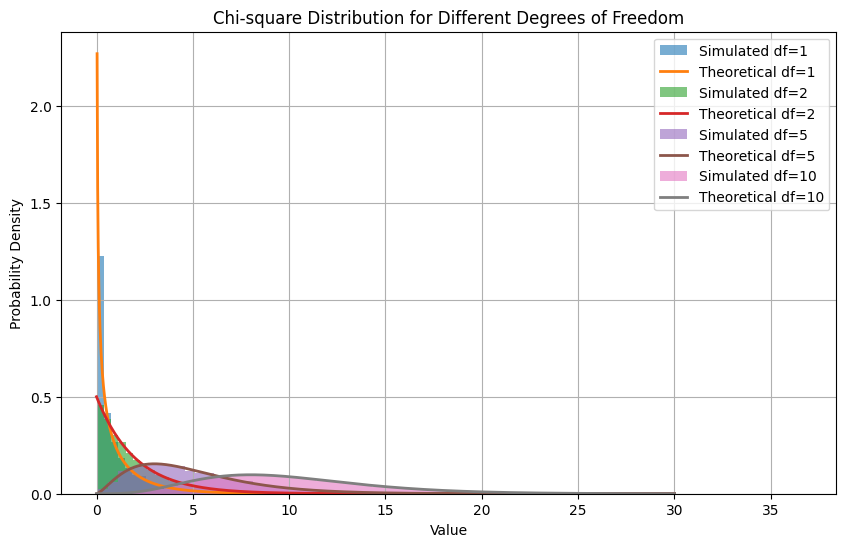

In [ ]:
#Question15- Create a Python script to simulate and visualize the Chi-square distribution and discuss its characteristics.
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def chi_square_simulation(df, size=10000):
    """Simulates Chi-square distribution with given degrees of freedom (df)."""
    return np.random.chisquare(df, size)

def plot_chi_square():
    """Plots the Chi-square distribution for different degrees of freedom."""
    dfs = [1, 2, 5, 10]  # Different degrees of freedom
    x = np.linspace(0, 30, 1000)  # X-axis range

    plt.figure(figsize=(10, 6))
    for df in dfs:
        samples = chi_square_simulation(df)
        plt.hist(samples, bins=50, density=True, alpha=0.6, label=f"Simulated df={df}")
        plt.plot(x, stats.chi2.pdf(x, df), linewidth=2, label=f"Theoretical df={df}")

    plt.xlabel("Value")
    plt.ylabel("Probability Density")
    plt.title("Chi-square Distribution for Different Degrees of Freedom")
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    plot_chi_square()


In [ ]:
#Question16- Implement an F-test using Python to compare the variances of two random samples.
import numpy as np
import scipy.stats as stats

def f_test(sample1, sample2):
    # Calculate sample variances
    var1 = np.var(sample1, ddof=1)  # Unbiased estimator (ddof=1 for sample variance)
    var2 = np.var(sample2, ddof=1)

    # Compute F-statistic (larger variance divided by smaller variance)
    if var1 > var2:
        F = var1 / var2
        dfn, dfd = len(sample1) - 1, len(sample2) - 1
    else:
        F = var2 / var1
        dfn, dfd = len(sample2) - 1, len(sample1) - 1

    # Compute p-value (two-tailed test)
    p_value = 2 * min(stats.f.cdf(F, dfn, dfd), 1 - stats.f.cdf(F, dfn, dfd))

    return F, p_value

# Example usage:
np.random.seed(42)
sample1 = np.random.normal(loc=50, scale=10, size=30)
sample2 = np.random.normal(loc=50, scale=15, size=30)

F_statistic, p_value = f_test(sample1, sample2)
print(f"F-statistic: {F_statistic:.4f}, p-value: {p_value:.4f}")


F-statistic: 2.4082, p-value: 0.0209


In [ ]:
#Question17- Write a Python program to perform an ANOVA test to compare means between multiple groups and interpret the results.
import scipy.stats as stats
import numpy as np

# Sample data (each list represents a different group)
group1 = [23, 25, 27, 30, 22, 24, 28]
group2 = [35, 37, 39, 40, 38, 36, 41]
group3 = [45, 47, 44, 46, 43, 42, 48]

def perform_anova(*groups):
    """Performs a one-way ANOVA test and interprets the results."""
    f_statistic, p_value = stats.f_oneway(*groups)

    print(f"F-statistic: {f_statistic:.4f}")
    print(f"P-value: {p_value:.4f}")

    alpha = 0.05  # Significance level
    if p_value < alpha:
        print("The differences between the groups are statistically significant (reject H0).")
    else:
        print("There is no significant difference between the groups (fail to reject H0).")

# Run ANOVA test
perform_anova(group1, group2, group3)


F-statistic: 115.4027
P-value: 0.0000
The differences between the groups are statistically significant (reject H0).


F-Statistic: 6.2688
P-Value: 0.0029


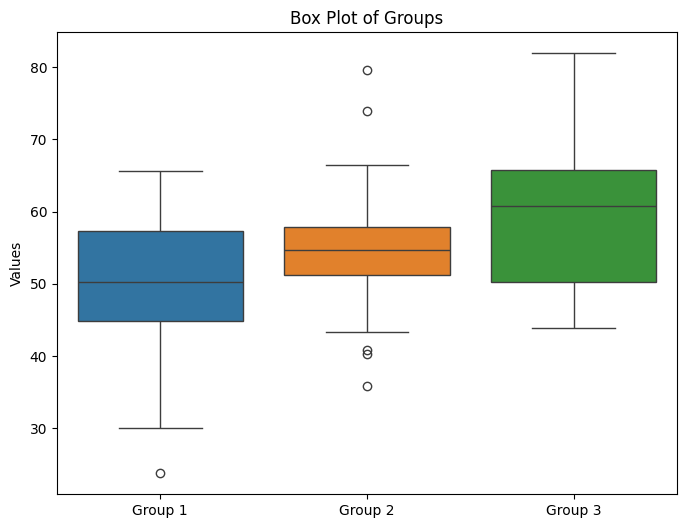

In [ ]:
#Question18- Perform a one-way ANOVA test using Python to compare the means of different groups and plot the results.
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Generate sample data for three groups
group1 = np.random.normal(loc=50, scale=10, size=30)
group2 = np.random.normal(loc=55, scale=10, size=30)
group3 = np.random.normal(loc=60, scale=10, size=30)

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(group1, group2, group3)

# Print results
print(f"F-Statistic: {f_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

# Plot the results
plt.figure(figsize=(8, 6))
sns.boxplot(data=[group1, group2, group3])
plt.xticks([0, 1, 2], ['Group 1', 'Group 2', 'Group 3'])
plt.ylabel("Values")
plt.title("Box Plot of Groups")
plt.show()


In [ ]:
#Question19- Write a Python function to check the assumptions (normality, independence, and equal variance) for ANOVA.
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan

def check_anova_assumptions(data, dependent_var, independent_var):
    """
    Checks ANOVA assumptions: Normality, Independence, and Homogeneity of Variance.

    Parameters:
        data (DataFrame): The dataset containing variables.
        dependent_var (str): The dependent variable (numeric).
        independent_var (str): The independent categorical variable.

    Returns:
        dict: Results of assumption tests.
    """
    # Fit ANOVA model
    model = smf.ols(f"{dependent_var} ~ C({independent_var})", data=data).fit()

    # Residuals
    residuals = model.resid

    # 1. Normality (Shapiro-Wilk test)
    shapiro_test = stats.shapiro(residuals)

    # 2. Independence (Durbin-Watson test)
    dw_test = durbin_watson(residuals)

    # 3. Homogeneity of Variance (Levene’s test)
    groups = [data[dependent_var][data[independent_var] == level] for level in data[independent_var].unique()]
    levene_test = stats.levene(*groups)

    return {
        "Normality (Shapiro-Wilk)": {"Statistic": shapiro_test.statistic, "p-value": shapiro_test.pvalue},
        "Independence (Durbin-Watson)": dw_test,
        "Homoscedasticity (Levene’s Test)": {"Statistic": levene_test.statistic, "p-value": levene_test.pvalue},
    }

# Example usage
if __name__ == "__main__":
    import pandas as pd

    # Sample Data
    np.random.seed(42)
    data = pd.DataFrame({
        "Group": np.repeat(["A", "B", "C"], 10),
        "Score": np.concatenate([
            np.random.normal(50, 10, 10),
            np.random.normal(55, 10, 10),
            np.random.normal(60, 10, 10)
        ])
    })

    results = check_anova_assumptions(data, "Score", "Group")
    print(results)




{'Normality (Shapiro-Wilk)': {'Statistic': np.float64(0.965340843081146), 'p-value': np.float64(0.420681994097831)}, 'Independence (Durbin-Watson)': np.float64(2.4275515958820955), 'Homoscedasticity (Levene’s Test)': {'Statistic': np.float64(0.018802090822339326), 'p-value': np.float64(0.9813864034270342)}}


                       df     sum_sq    mean_sq           F        PR(>F)
C(Diet)               2.0  26.246954  13.123477   14.381716  4.252673e-06
C(Exercise)           1.0  96.686016  96.686016  105.955979  1.505427e-16
C(Diet):C(Exercise)   2.0   0.398098   0.199049    0.218133  8.044722e-01
Residual             84.0  76.650940   0.912511         NaN           NaN


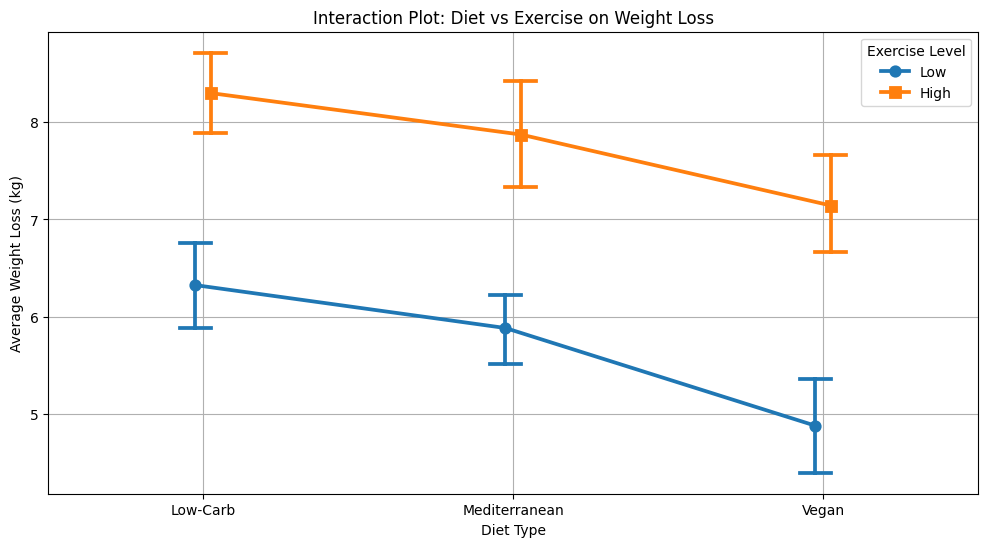

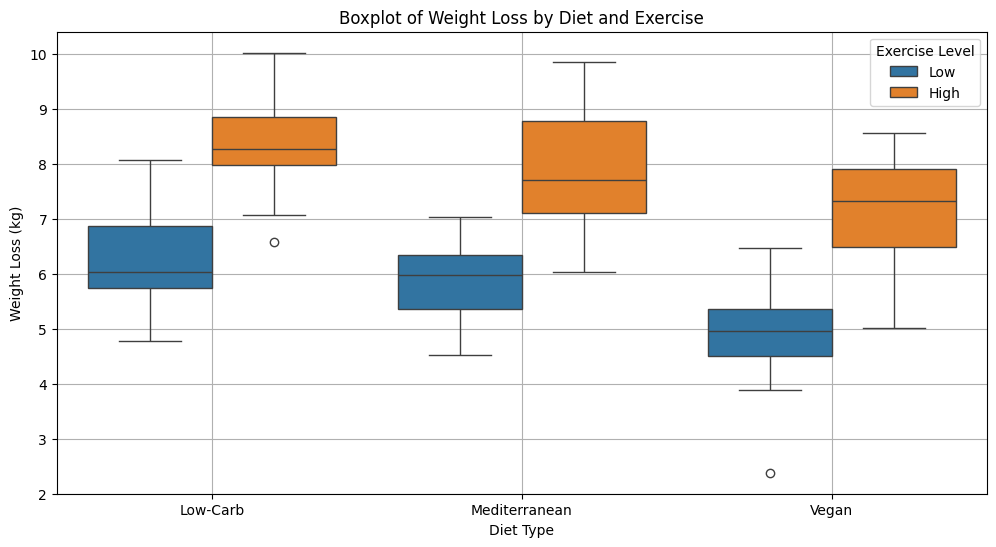

In [ ]:
#Question20- Perform a two-way ANOVA test using Python to study the interaction between two factors and visualize the results.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Generate sample data
np.random.seed(42)
n = 30  # Sample size per group

# Factors: Diet (A) and Exercise (B)
diet = np.repeat(["Low-Carb", "Mediterranean", "Vegan"], n)
exercise = np.tile(["Low", "High"], n * 3 // 2)

# Response variable: Weight Loss (kg)
weight_loss = (
    5 +   # Base weight loss
    (diet == "Low-Carb") * 1.5 +  # Effect of Low-Carb Diet
    (diet == "Mediterranean") * 1.0 +  # Effect of Mediterranean Diet
    (exercise == "High") * 2.0 +  # Effect of High Exercise
    np.random.normal(0, 1, len(diet))  # Random noise
)

# Create DataFrame
df = pd.DataFrame({"Diet": diet, "Exercise": exercise, "WeightLoss": weight_loss})

# Perform Two-Way ANOVA
model = ols("WeightLoss ~ C(Diet) + C(Exercise) + C(Diet):C(Exercise)", data=df).fit()
anova_results = anova_lm(model)

# Print ANOVA table
print(anova_results)

# Visualization
plt.figure(figsize=(12, 6))

# Interaction plot
sns.pointplot(x="Diet", y="WeightLoss", hue="Exercise", data=df, dodge=True, markers=["o", "s"], capsize=0.1)
plt.title("Interaction Plot: Diet vs Exercise on Weight Loss")
plt.xlabel("Diet Type")
plt.ylabel("Average Weight Loss (kg)")
plt.legend(title="Exercise Level")
plt.grid(True)
plt.show()

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="Diet", y="WeightLoss", hue="Exercise", data=df)
plt.title("Boxplot of Weight Loss by Diet and Exercise")
plt.xlabel("Diet Type")
plt.ylabel("Weight Loss (kg)")
plt.legend(title="Exercise Level")
plt.grid(True)
plt.show()


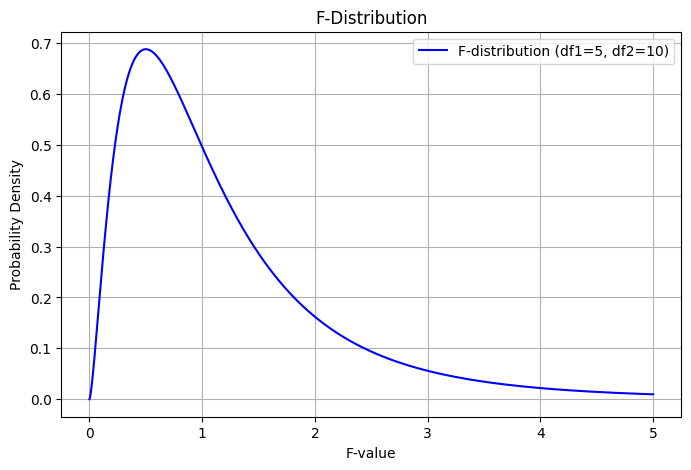

'\nThe F-distribution is primarily used in hypothesis testing for comparing variances\nbetween two populations, commonly in ANOVA (Analysis of Variance) and regression analysis.\n\nKey Uses:\n1. **ANOVA (Analysis of Variance):**\n   - Used to determine if the means of multiple groups are significantly different.\n   - The F-test compares the variance within groups to the variance between groups.\n   \n2. **Regression Analysis:**\n   - Used to assess the overall significance of a regression model.\n   - The F-test determines whether at least one of the predictor variables has a significant impact on the dependent variable.\n\nInterpreting the F-Test:\n- A higher F-value suggests greater variance between groups relative to within-group variance.\n- A low p-value (typically < 0.05) leads to rejecting the null hypothesis, indicating significant differences exist.\n'

In [ ]:
#Question21- Write a Python program to visualize the F-distribution and discuss its use in hypothesis testing.
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def plot_f_distribution(df1, df2):
    x = np.linspace(0, 5, 1000)  # Define range for x-axis
    y = stats.f.pdf(x, df1, df2)  # Compute F-distribution PDF

    plt.figure(figsize=(8, 5))
    plt.plot(x, y, label=f'F-distribution (df1={df1}, df2={df2})', color='blue')
    plt.xlabel('F-value')
    plt.ylabel('Probability Density')
    plt.title('F-Distribution')
    plt.legend()
    plt.grid()
    plt.show()

# Example: Plot F-distribution with degrees of freedom (df1=5, df2=10)
plot_f_distribution(5, 10)

# Explanation of its use in hypothesis testing:
'''
The F-distribution is primarily used in hypothesis testing for comparing variances
between two populations, commonly in ANOVA (Analysis of Variance) and regression analysis.

Key Uses:
1. **ANOVA (Analysis of Variance):**
   - Used to determine if the means of multiple groups are significantly different.
   - The F-test compares the variance within groups to the variance between groups.

2. **Regression Analysis:**
   - Used to assess the overall significance of a regression model.
   - The F-test determines whether at least one of the predictor variables has a significant impact on the dependent variable.

Interpreting the F-Test:
- A higher F-value suggests greater variance between groups relative to within-group variance.
- A low p-value (typically < 0.05) leads to rejecting the null hypothesis, indicating significant differences exist.
'''

F-statistic: 12.210
P-value: 0.000


<ipython-input-23-68615d21bbd7>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Values', data=df, palette='Set2')


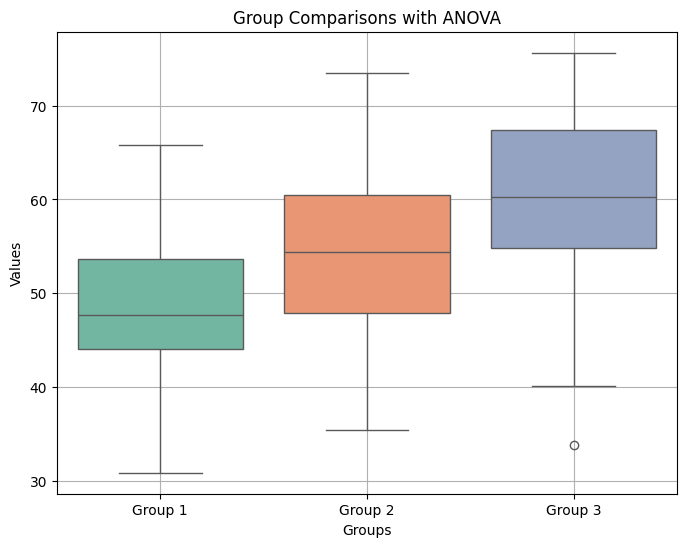

In [ ]:
#Question22- Perform a one-way ANOVA test in Python and visualize the results with boxplots to compare group means.
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Generate sample data
np.random.seed(42)
group1 = np.random.normal(loc=50, scale=10, size=30)
group2 = np.random.normal(loc=55, scale=10, size=30)
group3 = np.random.normal(loc=60, scale=10, size=30)

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2, group3)

# Print results
print(f"F-statistic: {f_statistic:.3f}")
print(f"P-value: {p_value:.3f}")

# Prepare data for visualization
data = {'Group 1': group1, 'Group 2': group2, 'Group 3': group3}
df = pd.DataFrame({
    'Group': np.concatenate([[key] * len(values) for key, values in data.items()]),
    'Values': np.concatenate(list(data.values()))
})

# Boxplot visualization
plt.figure(figsize=(8, 6))
sns.boxplot(x='Group', y='Values', data=df, palette='Set2')
plt.title('Group Comparisons with ANOVA')
plt.xlabel('Groups')
plt.ylabel('Values')
plt.grid(True)
plt.show()



In [ ]:
#Question23- Simulate random data from a normal distribution, then perform hypothesis testing to evaluate the means.
import numpy as np
import scipy.stats as stats

# Set seed for reproducibility
np.random.seed(42)

# Generate random data from normal distributions
sample_size = 100
mean1, std1 = 50, 10
mean2, std2 = 52, 10

sample1 = np.random.normal(mean1, std1, sample_size)
sample2 = np.random.normal(mean2, std2, sample_size)

# Perform independent t-test
stat, p_value = stats.ttest_ind(sample1, sample2)

# Print results
print(f"T-statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in means.")
else:
    print("Fail to reject the null hypothesis: No significant difference in means.")


T-statistic: -2.4766
P-value: 0.0141
Reject the null hypothesis: There is a significant difference in means.


In [ ]:
#Question24- Perform a hypothesis test for population variance using a Chi-square distribution and interpret the results.
import numpy as np
import scipy.stats as stats

def chi_square_variance_test(sample, claimed_variance, alpha=0.05):
    """
    Perform a hypothesis test for population variance using a Chi-square distribution.

    H0: The population variance is equal to the claimed variance.
    H1: The population variance is different from the claimed variance.

    Parameters:
    sample (array-like): Sample data
    claimed_variance (float): Claimed population variance (sigma^2)
    alpha (float): Significance level (default is 0.05)

    Returns:
    dict: Test results including test statistic, p-value, and conclusion.
    """
    n = len(sample)  # Sample size
    sample_variance = np.var(sample, ddof=1)  # Sample variance (unbiased)

    # Compute the test statistic (Chi-square value)
    chi_square_stat = (n - 1) * sample_variance / claimed_variance

    # Critical values for two-tailed test
    chi_critical_low = stats.chi2.ppf(alpha / 2, df=n - 1)
    chi_critical_high = stats.chi2.ppf(1 - alpha / 2, df=n - 1)

    # p-value calculation (two-tailed test)
    p_value = 2 * min(stats.chi2.cdf(chi_square_stat, df=n - 1),
                      1 - stats.chi2.cdf(chi_square_stat, df=n - 1))

    # Conclusion
    reject_null = chi_square_stat < chi_critical_low or chi_square_stat > chi_critical_high
    conclusion = "Reject H0: The population variance is significantly different from the claimed variance." \
        if reject_null else "Fail to reject H0: No significant evidence that the population variance differs."

    return {
        "Sample Variance": sample_variance,
        "Chi-Square Statistic": chi_square_stat,
        "p-value": p_value,
        "Critical Values": (chi_critical_low, chi_critical_high),
        "Conclusion": conclusion
    }

# Example usage
sample_data = [12, 15, 14, 10, 13, 14, 16, 12, 15, 11]
claimed_var = 4  # Hypothesized population variance
alpha = 0.05

results = chi_square_variance_test(sample_data, claimed_var, alpha)
print(results)

{'Sample Variance': np.float64(3.7333333333333334), 'Chi-Square Statistic': np.float64(8.4), 'p-value': np.float64(0.988783372964245), 'Critical Values': (np.float64(2.7003894999803584), np.float64(19.02276779864163)), 'Conclusion': 'Fail to reject H0: No significant evidence that the population variance differs.'}


In [ ]:
#Question25- Write a Python script to perform a Z-test for comparing proportions between two datasets or groups.
import numpy as np
import scipy.stats as stats

def z_test_proportions(successes1, n1, successes2, n2):
    """
    Perform a Z-test for comparing two proportions.

    Parameters:
    successes1 (int): Number of successes in group 1
    n1 (int): Sample size of group 1
    successes2 (int): Number of successes in group 2
    n2 (int): Sample size of group 2

    Returns:
    z_score (float): Computed Z-score
    p_value (float): Corresponding p-value for the test
    """

    # Compute sample proportions
    p1 = successes1 / n1
    p2 = successes2 / n2

    # Compute pooled proportion
    p_pool = (successes1 + successes2) / (n1 + n2)

    # Compute standard error
    se = np.sqrt(p_pool * (1 - p_pool) * (1/n1 + 1/n2))

    # Compute Z-score
    z_score = (p1 - p2) / se

    # Compute p-value (two-tailed test)
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

    return z_score, p_value

# Example usage
if __name__ == "__main__":
    successes1, n1 = 50, 200  # Group 1: 50 successes out of 200
    successes2, n2 = 30, 150  # Group 2: 30 successes out of 150

    z, p = z_test_proportions(successes1, n1, successes2, n2)
    print(f"Z-score: {z:.4f}")
    print(f"P-value: {p:.4f}")


Z-score: 1.1024
P-value: 0.2703


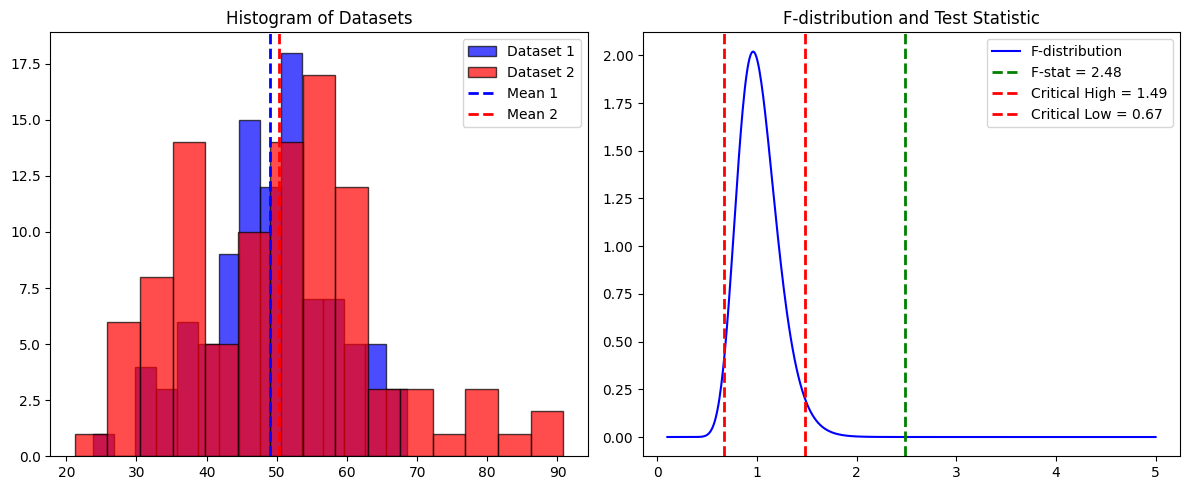

(np.float64(2.4811042864087596),
 np.float64(9.191624675830568e-06),
 np.float64(0.6728416631266823),
 np.float64(1.486233767619293))

In [ ]:
#Question26- Implement an F-test for comparing the variances of two datasets, then interpret and visualize the results.
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generate two random datasets
np.random.seed(42)
data1 = np.random.normal(loc=50, scale=10, size=100)  # Mean=50, Std=10, Size=100
data2 = np.random.normal(loc=50, scale=15, size=100)  # Mean=50, Std=15, Size=100

# Compute sample variances
var1 = np.var(data1, ddof=1)
var2 = np.var(data2, ddof=1)

# Compute the F-statistic (larger variance / smaller variance)
F_stat = max(var1, var2) / min(var1, var2)

# Degrees of freedom
df1 = len(data1) - 1
df2 = len(data2) - 1

# Compute p-value
p_value = 2 * (1 - stats.f.cdf(F_stat, df1, df2))  # Two-tailed test

# Critical value at alpha = 0.05
alpha = 0.05
F_critical_low = stats.f.ppf(alpha / 2, df1, df2)
F_critical_high = stats.f.ppf(1 - alpha / 2, df1, df2)

# Visualization: Histogram of datasets
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(data1, bins=15, alpha=0.7, label="Dataset 1", color='blue', edgecolor='black')
plt.hist(data2, bins=15, alpha=0.7, label="Dataset 2", color='red', edgecolor='black')
plt.axvline(np.mean(data1), color='blue', linestyle='dashed', linewidth=2, label="Mean 1")
plt.axvline(np.mean(data2), color='red', linestyle='dashed', linewidth=2, label="Mean 2")
plt.legend()
plt.title("Histogram of Datasets")

# Visualization: F-distribution
x = np.linspace(0.1, 5, 500)
y = stats.f.pdf(x, df1, df2)

plt.subplot(1, 2, 2)
plt.plot(x, y, 'b-', label='F-distribution')
plt.axvline(F_stat, color='green', linestyle='dashed', linewidth=2, label=f'F-stat = {F_stat:.2f}')
plt.axvline(F_critical_high, color='red', linestyle='dashed', linewidth=2, label=f'Critical High = {F_critical_high:.2f}')
plt.axvline(F_critical_low, color='red', linestyle='dashed', linewidth=2, label=f'Critical Low = {F_critical_low:.2f}')
plt.legend()
plt.title("F-distribution and Test Statistic")

plt.tight_layout()
plt.show()

# Interpretation
F_stat, p_value, F_critical_low, F_critical_high


In [ ]:
#Question27- Perform a Chi-square test for goodness of fit with simulated data and analyze the results.
import numpy as np
import scipy.stats as stats

# Simulated observed frequencies
np.random.seed(42)
categories = ["A", "B", "C", "D", "E"]
observed = np.random.randint(15, 35, size=len(categories))

# Expected frequencies (assuming uniform distribution)
expected = np.full_like(observed, np.mean(observed))

# Perform Chi-square test
chi2_stat, p_value = stats.chisquare(observed)

# Display results
print("Observed frequencies:", observed)
print("Expected frequencies:", expected)
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Result: The observed distribution significantly differs from the expected distribution (Reject H0).")
else:
    print("Result: No significant difference between observed and expected distributions (Fail to reject H0).")



Observed frequencies: [21 34 29 25 22]
Expected frequencies: [26 26 26 26 26]
Chi-square statistic: 4.3817
P-value: 0.3568
Result: No significant difference between observed and expected distributions (Fail to reject H0).


**Question1**- What is hypothesis testing in statistics?
**Answer**- Hypothesis testing is a statistical method used to make inferences or draw conclusions about a population based on sample data. It involves formulating two competing hypotheses and using sample data to determine which one is more likely to be true.

Key Components of Hypothesis Testing
Null Hypothesis (H₀)

Represents the status quo or no effect.

Assumes that there is no significant difference or relationship between variables.

Example: "There is no difference in average test scores between two teaching methods."

Alternative Hypothesis (H₁ or Ha)

Represents the claim being tested.

Suggests that there is a significant effect, difference, or relationship.

Example: "Students taught using Method A score higher on average than those using Method B."

Significance Level (α)

The probability of rejecting the null hypothesis when it is actually true (Type I error).

Common values: 0.05 (5%), 0.01 (1%).

Test Statistic

A value computed from the sample data that is used to determine whether to reject H₀.

Examples: z-score (for large samples), t-score (for small samples), chi-square statistic.

P-Value

The probability of obtaining test results at least as extreme as the observed data, assuming H₀ is true.

If p ≤ α, reject H₀ (evidence supports H₁).

If p > α, fail to reject H₀ (not enough evidence to support H₁).

Decision Rule

Based on the p-value or critical value approach, decide whether to reject or fail to reject H₀.

Types of Hypothesis Tests
One-Tailed Test: Tests if a parameter is greater than or less than a certain value.

Two-Tailed Test: Tests if a parameter is different (either higher or lower) from a certain value.

**Common Hypothesis Tests**
Z-Test (for large sample sizes, known population variance)

T-Test (for small samples, unknown population variance)

Chi-Square Test (for categorical data)

ANOVA (Analysis of Variance) (for comparing more than two groups)

Regression Analysis (to test relationships between variables)


**Question2**- What is the null hypothesis, and how does it differ from the alternative hypothesis?
**Answer**- 1) Null Hypothesis (H₀)
The null hypothesis is a statement that assumes no effect, no difference, or no relationship between variables in a population. It represents the default or status quo assumption and is tested to determine if there is enough evidence to reject it.
The null hypothesis is assumed to be true unless there is sufficient statistical evidence to reject it.

2) Alternative Hypothesis (H₁ or Ha)
The alternative hypothesis is a statement that contradicts the null hypothesis. It proposes that there is a significant effect, difference, or relationship between variables.
The alternative hypothesis is what researchers typically want to prove or support with statistical evidence.








**Question3**- What is the significance level in hypothesis testing, and why is it important?
**Answer**- The significance level (denoted as α) in hypothesis testing is the probability of rejecting the null hypothesis (H₀) when it is actually true. It represents the risk of making a Type I error (false positive). Common values for α are 0.05 (5%), 0.01 (1%), and 0.10 (10%), depending on the field of study and the level of confidence required.

**Why is it important?**
1. Controls the Risk of False Positives

A lower α reduces the chances of mistakenly concluding that an effect exists when it does not.

2. Determines Statistical Significance

If the p-value is less than α, we reject H₀, suggesting that the observed effect is statistically significant.

3. Balances Type I and Type II Errors

Choosing α affects the probability of a Type II error (β), which is the failure to reject H₀ when it is false. A very small α reduces Type I errors but increases the risk of Type II errors.

4. Consistency in Decision-Making

Standard significance levels (like 5%) provide a benchmark for comparison across studies.

In short, the significance level is crucial for making informed and reliable decisions in hypothesis testing.





**Question4**- What does a P-value represent in hypothesis testing?
**Answer**-In hypothesis testing, the P-value represents the probability of obtaining a test statistic as extreme as (or more extreme than) the observed value, assuming that the null hypothesis (H₀) is true.

Interpretation:
A small P-value (typically ≤ 0.05) suggests that the observed data is unlikely under the null hypothesis, leading to its rejection in favor of the alternative hypothesis (H₁).

A large P-value (greater than 0.05) suggests that the data is consistent with the null hypothesis, meaning there is not enough evidence to reject it.



**Question5**- How do you interpret the P-value in hypothesis testing?
**Answer**- In hypothesis testing, the P-value (probability value) measures the strength of evidence against the null hypothesis (
𝐻
0
H
0
​
 ). Here’s how to interpret it:

Definition: The P-value is the probability of obtaining a test statistic as extreme as (or more extreme than) the one observed, assuming that the null hypothesis is true.

Interpretation:

A small P-value (typically ≤ 0.05) suggests strong evidence against
𝐻
0
H
0
​
 , leading to its rejection. This means the observed data is unlikely under
𝐻
0
H
0
​
 , supporting the alternative hypothesis (
𝐻
𝐴
H
A
​
 ).

A large P-value (> 0.05) suggests weak or insufficient evidence against
𝐻
0
H
0
​
 , meaning we fail to reject
𝐻
0
H
0
​
 . The data is consistent with the null hypothesis.

Common Significance Levels (
𝛼
α):

0.05 (5%): If
𝑃
≤
0.05
P≤0.05, reject
𝐻
0
H
0
​
 ; otherwise, do not reject
𝐻
0
H
0
​
 .

0.01 (1%): A stricter threshold, reducing the chance of false positives.

0.10 (10%): A more lenient threshold, sometimes used in exploratory research.

Misconceptions:

The P-value does not measure the probability that
𝐻
0
H
0
​
  is true.

A non-significant result (
𝑃
>
0.05
P>0.05) does not prove
𝐻
0
H
0
​
 ; it only means there's not enough evidence to reject it.

Statistical significance does not imply practical significance.



**Question6**-What are Type 1 and Type 2 errors in hypothesis testing?
**Answer**- In hypothesis testing, Type 1 and Type 2 errors refer to the incorrect conclusions we can make about a null hypothesis (
𝐻
0
H
0
​
 ).

**Type 1 Error (False Positive)**
Occurs when we reject the null hypothesis when it is actually true.

In other words, we conclude that there is an effect or difference when none actually exists.

The probability of making a Type 1 error is denoted by α (alpha), which is the significance level (e.g., 0.05 or 5%).

Example: A medical test wrongly indicates that a healthy person has a disease.

**Type 2 Error (False Negative)**
Occurs when we fail to reject the null hypothesis when it is actually false.

In other words, we conclude that there is no effect or difference when one actually exists.

The probability of making a Type 2 error is denoted by β (beta).

The statistical power of a test is 1 - β, representing the ability to correctly detect an effect.

Example: A medical test fails to detect a disease in a sick person.

**Balancing Type 1 and Type 2 Errors**
Lowering α (making it harder to reject
𝐻
0
H
0
​
 ) reduces Type 1 errors but increases Type 2 errors.

Increasing sample size can help reduce both errors.



**Question7**-What is the difference between a one-tailed and a two-tailed test in hypothesis testing?
**Answer**- In hypothesis testing, the difference between a one-tailed and a two-tailed test lies in how the critical region is defined and how the alternative hypothesis is structured.

One-Tailed Test
A one-tailed test (also called a one-sided test) is used when the research hypothesis predicts a specific direction of the effect.

The critical region (rejection area) is located entirely in one tail of the probability distribution.

It tests whether the sample mean is significantly greater than or less than a hypothesized value.

Example:
Hypothesis:

𝐻
0
:
𝜇
=
50
H
0
​
 :μ=50 (null hypothesis)

𝐻
𝑎
:
𝜇
>
50
H
a
​
 :μ>50 (alternative hypothesis, right-tailed)

If the test statistic falls in the upper tail beyond a critical value (e.g., in a right-tailed test), we reject
𝐻
0
H
0
​
 .

Use Case: When you want to test if a new drug increases blood pressure (but not decreases it).

Two-Tailed Test
A two-tailed test (or two-sided test) is used when the research hypothesis does not predict a specific direction of the effect.

The critical region is split between both tails of the probability distribution.

It tests whether the sample mean is different from (either greater or less than) the hypothesized value.

Example:
Hypothesis:

𝐻
0
:
𝜇
=
50
H
0
​
 :μ=50 (null hypothesis)

𝐻
𝑎
:
𝜇
≠
50
H
a
​
 :μ

=50 (alternative hypothesis, two-tailed)

If the test statistic falls in either the upper or lower critical regions, we reject
𝐻
0
H
0
​
 .

Use Case: When testing if a new teaching method has any effect (increase or decrease) on student performance.



**Question8**- What is the Z-test, and when is it used in hypothesis testing?
**Answer**- The Z-test is a statistical test used to determine whether there is a significant difference between sample and population means, or between the means of two samples, when the population variance is known and the sample size is sufficiently large (typically
𝑛
≥
30
n≥30).

When to Use the Z-test:
Known Population Variance: The Z-test is appropriate when the population standard deviation (
𝜎
σ) is known. If the variance is unknown, a t-test is typically used instead.

Large Sample Size (
𝑛
≥
30
n≥30): According to the Central Limit Theorem (CLT), for large samples, the sampling distribution of the mean approximates a normal distribution even if the original population is not normal.

Normally Distributed Population: If the sample size is small (
𝑛
<
30
n<30), the population should be normally distributed for the Z-test to be valid.

Types of Z-tests:
1. One-Sample Z-test: Compares the sample mean to a known population mean.

2. Two-Sample Z-test: Compares the means of two independent samples.

Z-test for Proportions: Used to compare population proportions (e.g., comparing two success rates).



Question9- How do you calculate the Z-score, and what does it represent in hypothesis testing?
Answer- How to Calculate the Z-score
The Z-score (Z-value or standardized score) represents how many standard deviations a data point (or sample mean) is from the population mean. It is calculated using different formulas depending on the hypothesis test being conducted.

1. Z-score for a One-Sample Z-test:
𝑍
=
𝑋
ˉ
−
𝜇
𝜎
𝑛
Z=
n
​

σ
​

X
ˉ
 −μ
​

Where:

𝑋
ˉ
X
ˉ
  = Sample mean

𝜇
μ = Population mean

𝜎
σ = Population standard deviation

𝑛
n = Sample size

2. Z-score for a Two-Sample Z-test:
𝑍
=
(
𝑋
ˉ
1
−
𝑋
ˉ
2
)
−
(
𝜇
1
−
𝜇
2
)
𝜎
1
2
𝑛
1
+
𝜎
2
2
𝑛
2
Z=
n
1
​

σ
1
2
​

​
 +
n
2
​

σ
2
2
​

​

​

(
X
ˉ
  
1
​
 −
X
ˉ
  
2
​
 )−(μ
1
​
 −μ
2
​
 )
​

Where:

𝑋
ˉ
1
,
𝑋
ˉ
2
X
ˉ
  
1
​
 ,
X
ˉ
  
2
​
  = Sample means

𝜇
1
,
𝜇
2
μ
1
​
 ,μ
2
​
  = Population means (often assumed equal under
𝐻
0
H
0
​
 )

𝜎
1
,
𝜎
2
σ
1
​
 ,σ
2
​
  = Population standard deviations

𝑛
1
,
𝑛
2
n
1
​
 ,n
2
​
  = Sample sizes

3. Z-score for Population Proportions:
𝑍
=
𝑝
^
−
𝑝
𝑝
(
1
−
𝑝
)
𝑛
Z=
n
p(1−p)
​

​

p
^
​
 −p
​

Where:

𝑝
^
p
^
​
  = Sample proportion

𝑝
p = Population proportion

𝑛
n = Sample size

What Does the Z-score Represent in Hypothesis Testing?
Measures Standard Deviations from the Mean:

A positive Z-score means the sample mean is above the population mean.

A negative Z-score means the sample mean is below the population mean.

Determines Statistical Significance:

The Z-score is compared to a critical value from the standard normal distribution (Z-table).

If
∣
𝑍
∣
∣Z∣ is greater than the critical value (e.g., 1.96 for a 95% confidence level in a two-tailed test), we reject the null hypothesis.

P-value Calculation:

The p-value is the probability of obtaining a test statistic as extreme as the observed Z-score, assuming the null hypothesis is true.

A small p-value (e.g.,
𝑝
<
0.05
p<0.05) indicates strong evidence against the null hypothesis.



**Question10**- What is the T-distribution, and when should it be used instead of the normal distribution?
**Answer**- T-Distribution: Definition & Use Cases
The t-distribution (Student’s t-distribution) is a probability distribution used in statistical analysis when estimating population parameters when the sample size is small, and the population standard deviation is unknown. It is similar to the normal distribution but has heavier tails, meaning it accounts for greater variability in small samples.

When to Use the T-Distribution Instead of the Normal Distribution:
Unknown Population Standard Deviation (
𝜎
σ)

If the population standard deviation is unknown, the t-distribution is used with the sample standard deviation (
𝑠
s) as an estimate.

Small Sample Size (
𝑛
<
30
n<30)

When the sample size is small, the normal approximation may not be valid due to increased variability. The t-distribution adjusts for this by having wider tails.

Normally Distributed or Approximately Normal Data

The t-distribution assumes the underlying population is normally distributed or approximately normal, especially for small sample sizes.

For larger sample sizes (
𝑛
≥
30
n≥30), the Central Limit Theorem (CLT) allows the normal distribution to be used even if the data is not perfectly normal.



**Question11**- What is the difference between a Z-test and a T-test?
**Answer**- The Z-test and T-test are both statistical tests used to compare means and determine if there is a significant difference between them. However, they differ in their assumptions and use cases:

1. Sample Size
Z-test: Used when the sample size is large (n ≥ 30).

T-test: Used when the sample size is small (n < 30).

2. Population Standard Deviation
Z-test: Requires the population standard deviation (σ) to be known.

T-test: Used when the population standard deviation is unknown, and the sample standard deviation (s) is used instead.

3. Distribution Assumption
Z-test: Assumes the data follows a normal distribution.

T-test: Also assumes normality, but is more flexible for small sample sizes due to the t-distribution, which has heavier tails.

4. Test Statistic
Z-test statistic formula:

𝑍
=
𝑥
ˉ
−
𝜇
𝜎
𝑛
Z=
n
​

σ
​

x
ˉ
 −μ
​

T-test statistic formula:

𝑇
=
𝑥
ˉ
−
𝜇
𝑠
𝑛
T=
n
​

s
​

x
ˉ
 −μ
​

The Z-test uses the standard normal distribution (Z-table), while the T-test uses the t-distribution, which changes based on degrees of freedom (df = n - 1).

5. Use Cases
Z-test:

When the sample size is large.

When the population standard deviation is known.

Example: Comparing a sample mean to a known population mean (one-sample Z-test).

T-test:

When the sample size is small.

When the population standard deviation is unknown.

Example: Comparing the means of two small groups (independent or paired T-tests).



**Question12**- What is the T-test, and how is it used in hypothesis testing?
**Answer**-What is the T-test?
A T-test is a statistical test used to determine if there is a significant difference between the means of two groups. It is commonly used when:

The sample size is small (n < 30).

The population standard deviation (σ) is unknown (so we use the sample standard deviation, s).

The data is approximately normally distributed.

Types of T-tests
There are three main types of T-tests:

One-sample T-test: Compares the mean of a single sample to a known population mean.

Independent (Two-sample) T-test: Compares the means of two independent groups.

Paired (Dependent) T-test: Compares the means of the same group at two different points in time (before/after testing).

**Question13**- What is the relationship between Z-test and T-test in hypothesis testing?
**Answer**-Relationship Between Z-test and T-test in Hypothesis Testing
The Z-test and T-test are both used in hypothesis testing to determine whether a sample mean significantly differs from a population mean or another sample mean. While they serve similar purposes, they differ in when and how they are applied.

1. Similarities
Both tests help determine whether to reject or fail to reject the null hypothesis (H₀).

Both use a test statistic formula that compares the sample mean to a known or assumed mean.

Both assume that the data is approximately normally distributed.

Both involve comparing the test statistic to a critical value from a statistical table (Z-table or T-table) or using a p-value to draw conclusions.
2. How They Are Connected
The T-test is a generalization of the Z-test. When the sample size is large (n ≥ 30), the T-distribution approximates the standard normal distribution, making the T-test and Z-test results nearly identical.

The Z-test assumes we know the true population standard deviation (σ), while the T-test estimates it using the sample standard deviation (s).

When n is large, the sample standard deviation (s) becomes a good estimate of σ, and the T-distribution approaches the normal distribution, making a Z-test appropriate.


**Key Takeaway**
1. Z-test is used when population parameters are known and for large samples.

2. T-test is used when population parameters are unknown and for small samples.

3. As sample size increases, the T-test results become similar to a Z-test.



**Question14**- What is a confidence interval, and how is it used to interpret statistical results?
**Answer**-What is a Confidence Interval (CI)?
A confidence interval (CI) is a range of values that provides an estimate of a population parameter (such as a mean or proportion) based on sample data. It expresses how uncertain or certain we are about an estimate by providing an interval where the true population parameter is likely to fall.

For example, if we calculate a 95% confidence interval for the average height of students as (165 cm, 175 cm), it means we are 95% confident that the true average height of all students falls within this range.

How is a Confidence Interval Calculated?
A confidence interval is computed using the formula:

𝐶
𝐼
=
𝑥
ˉ
±
(
𝑡
𝛼
/
2
×
𝑠
𝑛
)
CI=
x
ˉ
 ±(t
α/2
​
 ×
n
​

s
​
 )
or

𝐶
𝐼
=
𝑥
ˉ
±
(
𝑍
𝛼
/
2
×
𝜎
𝑛
)
CI=
x
ˉ
 ±(Z
α/2
​
 ×
n
​

σ
​
 )
where:

𝑥
ˉ
x
ˉ
  = Sample mean

𝑡
𝛼
/
2
t
α/2
​
  or
𝑍
𝛼
/
2
Z
α/2
​
  = Critical value from the t-distribution (for small samples) or Z-distribution (for large samples)

𝑠
s = Sample standard deviation (when population standard deviation is unknown)

𝜎
σ = Population standard deviation (if known)

𝑛
n = Sample size

The choice between Z and t depends on sample size and whether the population standard deviation (
𝜎
σ) is known.



**Question15**- What is the margin of error, and how does it affect the confidence interval?
**Answer**-What is the Margin of Error (MOE)?
The Margin of Error (MOE) is the range within which the true population parameter is expected to fall, given a certain confidence level. It quantifies the uncertainty in an estimate by showing how much the sample statistic (such as the mean or proportion) might vary due to sampling error.

The MOE is the part of the confidence interval (CI) that accounts for sampling variability. A smaller MOE means a more precise estimate, while a larger MOE means more uncertainty.

How Margin of Error Affects the Confidence Interval
A confidence interval is calculated as:

𝐶
𝐼
=
𝑥
ˉ
±
𝑀
𝑂
𝐸
CI=
x
ˉ
 ±MOE
A larger MOE → A wider confidence interval → Less precision in the estimate.

A smaller MOE → A narrower confidence interval → More precision in the estimate.

Factors Affecting the Margin of Error
Confidence Level (
𝛼
α)

Higher confidence (e.g., 99%) increases MOE (wider CI).

Lower confidence (e.g., 90%) decreases MOE (narrower CI).

Sample Size (
𝑛
n)

Larger sample sizes decrease MOE (more precision).

Smaller sample sizes increase MOE (less precision).

Standard Deviation (
𝜎
σ or
𝑠
s)

More variability in data increases MOE.

Less variability decreases MOE.




**Question16**- How is Bayes' Theorem used in statistics, and what is its significance?
**Answer**- Bayes' Theorem is a fundamental concept in statistics and probability theory that describes how to update our beliefs in light of new evidence. It provides a mathematical framework for revising probabilities based on new data.

Bayes' Theorem Formula
Bayes' Theorem states:

𝑃
(
𝐴
∣
𝐵
)
=
𝑃
(
𝐵
∣
𝐴
)
𝑃
(
𝐴
)
𝑃
(
𝐵
)
P(A∣B)=
P(B)
P(B∣A)P(A)
​

where:

𝑃
(
𝐴
∣
𝐵
)
P(A∣B) is the posterior probability, the probability of event
𝐴
A occurring given that
𝐵
B has occurred.

𝑃
(
𝐵
∣
𝐴
)
P(B∣A) is the likelihood, the probability of event
𝐵
B occurring given that
𝐴
A is true.

𝑃
(
𝐴
)
P(A) is the prior probability, the initial belief about
𝐴
A before observing
𝐵
B.

𝑃
(
𝐵
)
P(B) is the marginal probability, the total probability of event
𝐵
B occurring.

**Significance of Bayes' Theorem**
1. Updating Beliefs: Bayes' Theorem allows us to update probabilities when new data is available. This is crucial in fields like medical diagnosis, spam filtering, and machine learning.

2. Decision Making Under Uncertainty: It helps in making informed decisions where certainty is impossible, such as in risk analysis and quality control.

3. Machine Learning & AI: Many algorithms, such as the Naïve Bayes classifier, rely on Bayesian principles to make predictions and classify data.

4. Medical and Scientific Applications: In medical testing, it helps determine the likelihood of having a disease given a positive test result, considering false positives and false negatives.

5. Legal and Forensic Science: Bayes' Theorem is used to assess the probability of guilt based on forensic evidence.



**Question17**- What is the Chi-square distribution, and when is it used?
**Answer**- Chi-square (χ²) distribution is a probability distribution that arises in statistics when dealing with variance and categorical data. It is widely used for hypothesis testing and confidence interval estimation.

Definition and Properties
The Chi-square distribution is the sum of the squares of
𝑘
k independent standard normal variables:

𝑋
=
𝑍
1
2
+
𝑍
2
2
+
⋯
+
𝑍
𝑘
2
X=Z
1
2
​
 +Z
2
2
​
 +⋯+Z
k
2
​

where
𝑍
𝑖
Z
i
​
  follows a standard normal distribution (
𝑁
(
0
,
1
)
N(0,1)).

It is asymmetrical and skewed right, but as the degrees of freedom (
𝑘
k) increase, it approaches a normal distribution.

The degrees of freedom (df) determine its shape and are often related to sample size.

**When is the Chi-square Distribution Used?**
1. Chi-square Test for Independence

Used to determine if two categorical variables are independent in a contingency table.

Example: Is there a relationship between gender and voting preference?

2. Chi-square Goodness-of-Fit Test

Checks if a sample distribution matches an expected probability distribution.

Example: Do dice rolls follow a uniform distribution?

3. Chi-square Test for Homogeneity

Compares distributions of a categorical variable across different populations.

Example: Do different age groups prefer different social media platforms?

4. Confidence Intervals for Variance

Used to estimate the variance of a normally distributed population.

Example: Estimating the variability in manufacturing processes.

**Question18**- What is the Chi-square goodness of fit test, and how is it applied?
**Answer**-The Chi-Square Goodness of Fit Test is a statistical test used to determine whether a sample data set fits a specified theoretical distribution. It helps assess whether observed frequencies in categorical data significantly deviate from expected frequencies based on a given hypothesis.

How It Works
The test compares observed (O) and expected (E) frequencies to check if differences are due to random variation or if they indicate a statistically significant deviation.

Formula
𝜒
2
=
∑
(
𝑂
−
𝐸
)
2
𝐸
χ
2
 =∑
E
(O−E)
2

​

where:

𝑂
O = Observed frequency in each category

𝐸
E = Expected frequency in each category

The summation runs over all categories



**Question19**-What is the F-distribution, and when is it used in hypothesis testing?
**Answer**-The F-distribution is a continuous probability distribution that arises frequently in statistical hypothesis testing, particularly in the analysis of variance (ANOVA) and regression analysis. It is named after Sir Ronald Fisher.

Characteristics of the F-Distribution:
1. It is asymmetric and positively skewed.

2. It is non-negative, meaning it only takes values greater than or equal to zero.

3. The shape depends on two degrees of freedom (df):

𝑑
𝑓
1
df
1
​
  (numerator degrees of freedom)

𝑑
𝑓
2
df
2
​
  (denominator degrees of freedom)

4. As the degrees of freedom increase, the distribution becomes more symmetric and approaches a normal shape.



**Question20**-What is an ANOVA test, and what are its assumptions?
Answer-ANOVA (Analysis of Variance) Test
ANOVA is a statistical method used to compare the means of three or more groups to determine if there is a significant difference between them. It helps to test the null hypothesis that all group means are equal against the alternative hypothesis that at least one group mean is different.

**Types of ANOVA**
1. One-Way ANOVA – Compares means across one independent variable (factor) with multiple levels.

2. Two-Way ANOVA – Examines the effect of two independent variables and their interaction.

3. Repeated Measures ANOVA – Used when the same subjects are measured multiple times.



**Question21**- What are the different types of ANOVA tests?
**Answer**-Types of ANOVA Tests
ANOVA tests come in different types based on the number of independent variables (factors), whether measurements are repeated, and the nature of the data.

1. One-Way ANOVA
Purpose: Compares the means of three or more independent groups based on a single independent variable (factor).

Example: Testing if different diets lead to different weight loss results in three groups.

Assumptions:
Normality of residuals.

Homogeneity of variances.

Independence of observations.

2. Two-Way ANOVA
Purpose: Examines the effect of two independent variables (factors) on a dependent variable, along with their possible interaction.

Example: Studying how "diet type" and "exercise level" influence weight loss.

Types:
Without Interaction: Examines only the main effects of two factors.

With Interaction: Also examines whether the two factors interact (e.g., whether exercise level changes the effect of diet type on weight loss).

3. Repeated Measures ANOVA
Purpose: Used when the same subjects are tested multiple times under different conditions or over time.

Example: Measuring blood pressure in the same individuals before, during, and after a medical treatment.

Assumptions:
Sphericity (variances of differences between repeated measures should be equal, tested using Mauchly’s test).

Normality of residuals.

Alternative: If sphericity is violated, use Greenhouse-Geisser correction or Huynh-Feldt correction.

4. Mixed-Design ANOVA (Split-Plot ANOVA)
Purpose: Used when there are both repeated measures (within-subjects) and independent groups (between-subjects).

Example: Studying the effects of different therapies (between-subjects) on anxiety levels measured at multiple time points (within-subjects).

5. MANOVA (Multivariate Analysis of Variance)
Purpose: Used when there are multiple dependent variables instead of just one.

Example: Examining how different study techniques impact students’ test scores in math, science, and reading simultaneously.

6. ANCOVA (Analysis of Covariance)
Purpose: Similar to ANOVA but adjusts for the effects of one or more continuous covariates (control variables).

Example: Studying the effect of different diets on weight loss while controlling for initial weight.

7. MANCOVA (Multivariate Analysis of Covariance)
Purpose: A combination of MANOVA and ANCOVA, which accounts for covariates while analyzing multiple dependent variables.

Example: Examining the effect of a drug on blood pressure and cholesterol while controlling for age.



**Question22**- What is the F-test, and how does it relate to hypothesis testing?
**Answer**-What is the F-Test?
The F-test is a statistical test that compares the variances or means of two or more groups to determine if they are significantly different. It is commonly used in ANOVA (Analysis of Variance) and regression analysis. The test statistic follows an F-distribution, which is a ratio of two variances.

Formula for the F-Statistic
𝐹
=
Variance between groups
Variance within groups
F=
Variance within groups
Variance between groups
​

A large F-value suggests that group means are significantly different.

A small F-value suggests that group means are similar.

F-Test in Hypothesis Testing
The F-test is used to test null and alternative hypotheses, depending on the context.

1. In ANOVA (Analysis of Variance)
Null Hypothesis (
𝐻
0
H
0
​
 ): All group means are equal.

Alternative Hypothesis (
𝐻
𝐴
H
A
​
 ): At least one group mean is different.

If the F-test in ANOVA produces a statistically significant result (p-value < significance level, e.g., 0.05), we reject the null hypothesis and conclude that there is a difference among the group means.

2. In Variance Comparison (Homogeneity of Variance)
Null Hypothesis (
𝐻
0
H
0
​
 ): The variances of two populations are equal.

Alternative Hypothesis (
𝐻
𝐴
H
A
​
 ): The variances are different.

This is useful for testing assumptions in t-tests and ANOVA (e.g., Levene’s test or Bartlett’s test).

3. In Regression Analysis (Overall Model Significance)
Null Hypothesis (
𝐻
0
H
0
​
 ): The independent variable(s) do not explain variation in the dependent variable.

Alternative Hypothesis (
𝐻
𝐴
H
A
​
 ): At least one independent variable significantly predicts the dependent variable.

A high F-statistic in regression suggests that the model is useful for explaining the variance in the dependent variable.

